# Lab 9 - SVMs - Decision Trees
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 1 April 2020
- **Course:** INFO 251: Applied machine learning

In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import IPython
import graphviz 
%matplotlib inline


### Topics:
1. Support vector machines (SVMs)http://cs229.stanford.edu/notes/cs229-notes3.pdf
2. Decision Trees http://cs229.stanford.edu/notes/cs229-notes-dt.pdf
3. Random Forests


## Data: 
Cancer dataset. Labels malignant or benign. Features include mean radius, mean texture, mean perimeter etc 

In [2]:
cancer = datasets.load_breast_cancer()
print("######## Features ########")
print("Features: ", cancer.feature_names)
print("######## Labels ########")
# 0-malignant, 1-benign
print("Labels: ", cancer.target_names)
print("######## Size ########")
print("{} data points and with {} features".format(cancer.data.shape[0],cancer.data.shape[1]))



######## Features ########
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
######## Labels ########
Labels:  ['malignant' 'benign']
######## Size ########
569 data points and with 30 features


## Feature selection

SelectKBest selects the k highest scoring features according to a specified criterion.

For example, in a classification scenario with mutual information criterion:

-- SelectKBest computes a score between each feature of X and y

-- Score: Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

https://en.wikipedia.org/wiki/Mutual_information

-- Small values mean independence between the feature and the labels.

-- Large value shows non-random dependence and hence good features.

-- Keep K best scoring features



In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Split data in train and test sets
# 80% train 20% test

X_total = cancer.data
y = cancer.target
# 
selector = SelectKBest(mutual_info_classif, k=2)
X = selector.fit_transform(X_total, y)
# Chosen features selector.get_support()

features = cancer.feature_names[selector.get_support()]
#IPython.embed()

#X = X_total[:, 0:10]
#IPython.embed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 


## SVMs

In [ ]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='linear') 
# SVC params: C (regularization penalty)

# Train model
clf.fit(X_train, y_train)
# Get coeffieicent nad intercept
print(clf.coef_)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_test)
print("Accuracy of SVM is {}".format(sum(y_pred==y_test)/len(y_test)))

## Decision Trees

In [10]:
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split

In [41]:
# useful params: criterion='entropy', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4)
model.fit(X_train, y_train)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))

11
4
Accuracy of decision tree is 0.9210526315789473


## Feature importance
 

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen

https://stats.stackexchange.com/questions/311488/summing-feature-importance-in-scikit-learn-for-a-set-of-features

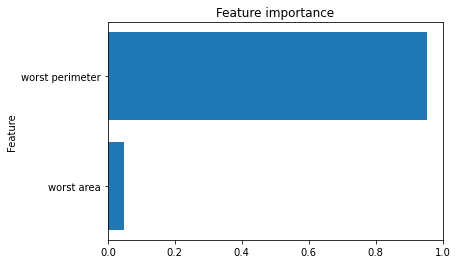

In [42]:
features_plot = features
importances = model.feature_importances_
idx = np.argsort(importances)
plt.title("Feature importance")
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), [features[i] for i in idx])
plt.ylabel("Feature")
plt.show()

## Plot tree

In [43]:
# this package is helpful in plotting the trees
dot_data = tree.export_graphviz(model, out_file=None,
                                class_names=['benign','malignant'], 
                                feature_names=features,
                                special_characters=True, max_depth=3)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

[Text(198.23684210526318, 195.696, 'X[0] <= 114.4\nentropy = 0.957\nsamples = 455\nvalue = [172, 283]'),
 Text(96.91578947368421, 152.208, 'X[0] <= 101.65\nentropy = 0.521\nsamples = 316\nvalue = [37, 279]'),
 Text(35.242105263157896, 108.72, 'X[0] <= 85.095\nentropy = 0.205\nsamples = 249\nvalue = [8, 241]'),
 Text(17.621052631578948, 65.232, 'entropy = 0.0\nsamples = 130\nvalue = [0, 130]'),
 Text(52.863157894736844, 65.232, 'X[1] <= 514.9\nentropy = 0.355\nsamples = 119\nvalue = [8, 111]'),
 Text(35.242105263157896, 21.744, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(70.48421052631579, 21.744, 'entropy = 0.296\nsamples = 115\nvalue = [6, 109]'),
 Text(158.58947368421053, 108.72, 'X[1] <= 888.9\nentropy = 0.987\nsamples = 67\nvalue = [29, 38]'),
 Text(123.34736842105264, 65.232, 'X[1] <= 762.5\nentropy = 0.965\nsamples = 59\nvalue = [23, 36]'),
 Text(105.72631578947369, 21.744, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(140.96842105263158, 21.744, 'entropy = 0.

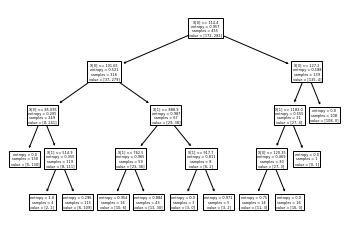

In [44]:
tree.plot_tree(model)

## Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [51]:
from sklearn.ensemble import RandomForestClassifier
k = 5
clf = RandomForestClassifier(criterion='entropy', max_depth=k)
# params: n_estimators=100 (number of trees in the forest), criterion (eg entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(X_train, y_train)
predict_labels = clf.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))


Accuracy of decision tree is 0.9473684210526315
